In [1]:
!pip install GPUtil

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [12]:
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import configs
import run_ZSSR
import run_ZSSR_single_input
import ZSSR
import imresize
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
run_ZSSR.main(None,None)

In [7]:
#given an image, downgrade it and then upgrade it using ZSSR
#import cv2
img= cv2.imread('D:\\NICOLAS\Documents\centrale\G3\sdi\\thouvenin\ZSSR_group_work\\test_data\ministres_gt.png')

#downgrade the image
downgraded_img = imresize.imresize(img,0.5)

#save the downgraded image
cv2.imwrite('D:\\NICOLAS\Documents\centrale\G3\sdi\\thouvenin\ZSSR_group_work\\test_data\ministres.png',downgraded_img)

run_ZSSR.main(None,None)



no kernel loaded
['d:\\NICOLAS\\Documents\\centrale\\G3\\sdi\\thouvenin\\ZSSR_group_work/test_data\\ministres_0.mat;']
*****
** Start training for sf= [2.0, 2.0]  **
sf: [2. 2.] , iteration:  0 , loss:  0.013050031
iteration:  0 reconstruct mse: 0.0009415601 , true mse: 0.00085041503
sf: [2. 2.] , iteration:  20 , loss:  0.01235567
sf: [2. 2.] , iteration:  40 , loss:  0.0
iteration:  50 reconstruct mse: 0.0009415616 , true mse: 0.00085041684
sf: [2. 2.] , iteration:  60 , loss:  0.0
sf: [2. 2.] , iteration:  80 , loss:  0.024301803
sf: [2. 2.] , iteration:  100 , loss:  0.022745678
iteration:  100 reconstruct mse: 0.00094156136 , true mse: 0.0008504167
sf: [2. 2.] , iteration:  120 , loss:  0.019635687
sf: [2. 2.] , iteration:  140 , loss:  0.0
iteration:  150 reconstruct mse: 0.0009410051 , true mse: 0.00085005484
sf: [2. 2.] , iteration:  160 , loss:  0.0034039312
sf: [2. 2.] , iteration:  180 , loss:  0.025875062
sf: [2. 2.] , iteration:  200 , loss:  0.0010499924
iteration:  200 r

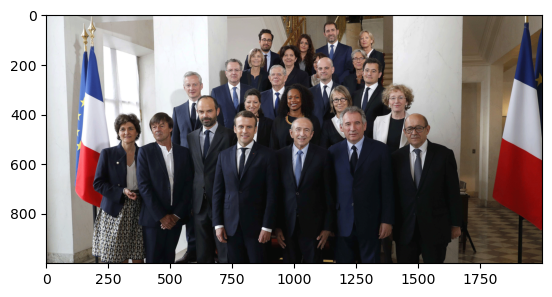

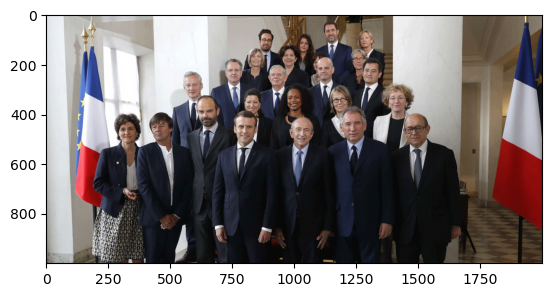

psnr zssr: 32.67826802441785
ssim zssr: 0.8514909151974978


In [13]:

#use those metrics to compare the zssr-image and downgraded one to the original image

img= cv2.imread('D:\\NICOLAS\Documents\centrale\G3\sdi\\thouvenin\ZSSR_group_work\\test_data\ministres_gt.png',cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2=cv2.imread('D:\\NICOLAS\Documents\centrale\G3\sdi\\thouvenin\ZSSR_group_work\\results\\test_Feb_09_09_24_53\ministres_zssr_X2.00X2.00.png',cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#show the images
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()


psnr_zssr = psnr(img,img2)

print('psnr zssr:',psnr_zssr)

ssim_zssr = ssim(img,img2,channel_axis=2)

print('ssim zssr:',ssim_zssr)

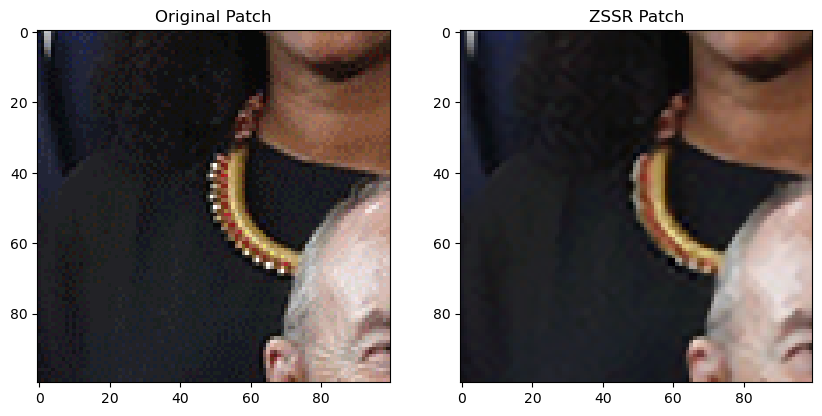

In [14]:

# Load the images
img_original = cv2.imread('D:\\NICOLAS\Documents\centrale\G3\sdi\\thouvenin\ZSSR_group_work\\test_data\ministres_gt.png')
img_zssr = cv2.imread('D:\\NICOLAS\Documents\centrale\G3\sdi\\thouvenin\ZSSR_group_work\\results\\test_Feb_09_09_24_53\ministres_zssr_X2.00X2.00.png')

# Convert images to grayscale
img_original_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
img_zssr_gray = cv2.cvtColor(img_zssr, cv2.COLOR_BGR2GRAY)

# Compute absolute difference
abs_diff = cv2.absdiff(img_original_gray, img_zssr_gray)

# Find the region with the highest differences
max_diff_indices = np.unravel_index(np.argmax(abs_diff), abs_diff.shape)
patch_size = 100
top_left_x = max_diff_indices[1] - patch_size // 2
top_left_y = max_diff_indices[0] - patch_size // 2

# Crop the patches from both images
patch_original = img_original[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :]
patch_zssr = img_zssr[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :]

# Plot the patches
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(patch_original, cv2.COLOR_BGR2RGB))
plt.title('Original Patch')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(patch_zssr, cv2.COLOR_BGR2RGB))
plt.title('ZSSR Patch')

plt.show()


<Figure size 1500x500 with 0 Axes>

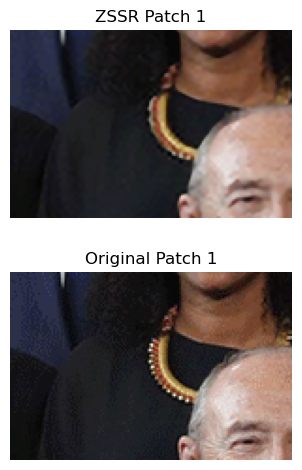

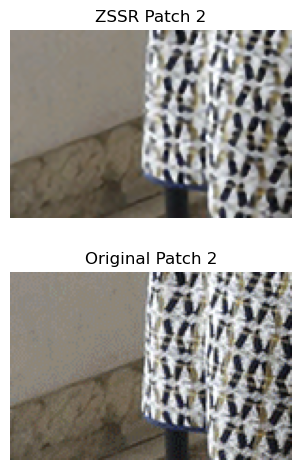

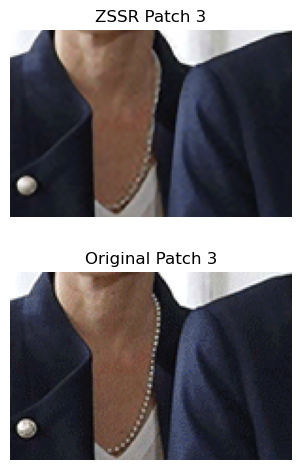

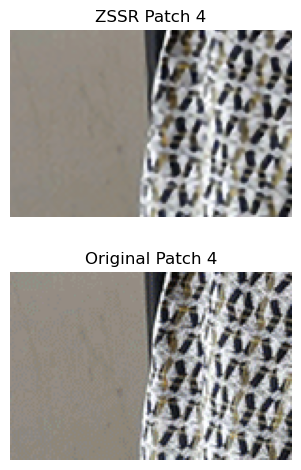

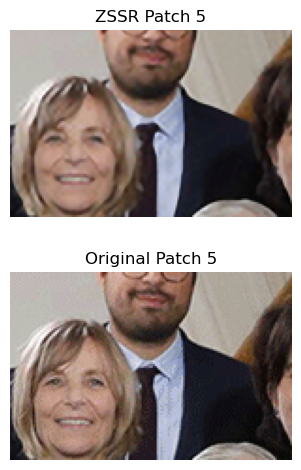

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def find_top_n_patches(abs_diff, n_patches, patch_size):
    top_n_patches = []
    for _ in range(n_patches):
        max_diff_index = np.unravel_index(np.argmax(abs_diff), abs_diff.shape)
        top_left_x = max_diff_index[1] - patch_size[1] // 2
        top_left_y = max_diff_index[0] - patch_size[0] // 2
        patch = abs_diff[top_left_y:top_left_y + patch_size[0], top_left_x:top_left_x + patch_size[1]]
        top_n_patches.append(((top_left_y, top_left_x), patch))
        # Set the region around the found patch to zero to avoid selecting it again
        abs_diff[top_left_y:top_left_y + patch_size[0], top_left_x:top_left_x + patch_size[1]] = 0
    return top_n_patches

# Load the images
img_original = cv2.imread('D:\\NICOLAS\Documents\centrale\G3\sdi\\thouvenin\ZSSR_group_work\\test_data\ministres_gt.png')
img_zssr = cv2.imread('D:\\NICOLAS\Documents\centrale\G3\sdi\\thouvenin\ZSSR_group_work\\results\\test_Feb_09_09_24_53\ministres_zssr_X2.00X2.00.png')

# Convert images to grayscale
img_original_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
img_zssr_gray = cv2.cvtColor(img_zssr, cv2.COLOR_BGR2GRAY)

# Compute absolute difference
abs_diff = cv2.absdiff(img_original_gray, img_zssr_gray)

# Parameters
n_patches = 5
patch_size = (100, 150)  # height, width

# Find the top n patches
top_n_patches = find_top_n_patches(abs_diff, n_patches, patch_size)

# Plot the patches
for i, ((top_left_y, top_left_x), patch) in enumerate(top_n_patches):
    plt.figure(figsize=(15, 5))
    plt.subplot(2, n_patches, n_patches + i + 1)
    patch_original = img_original[top_left_y:top_left_y + patch_size[0], top_left_x:top_left_x + patch_size[1], :]
    patch_zssr = img_zssr[top_left_y:top_left_y + patch_size[0], top_left_x:top_left_x + patch_size[1], :]
    plt.imshow(cv2.cvtColor(patch_original, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Patch {i+1}')
    plt.axis('off')
    plt.subplot(2, n_patches, i + 1)
    plt.imshow(cv2.cvtColor(patch_zssr, cv2.COLOR_BGR2RGB))
    plt.title(f'ZSSR Patch {i+1}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
